In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
##### perfect case
dir_case = 'output/9481eV/scans/'
fname_perfect = dir_case + 'perfect.h5'

with h5py.File(fname_perfect, 'r') as f:
    m2_p = f['m2_p'][:]
    pulse_duration0 = f['pulse_duration'][:]
    pulse_tilt0 = f['tilt'][:]
    spatial_chirp0 = f['chirp'][:]
    energy_bandwidth0 = f['bandwidth'][:]
    throughput0 = f['throughput'][:]


m2_p optimized 189.17739709387004


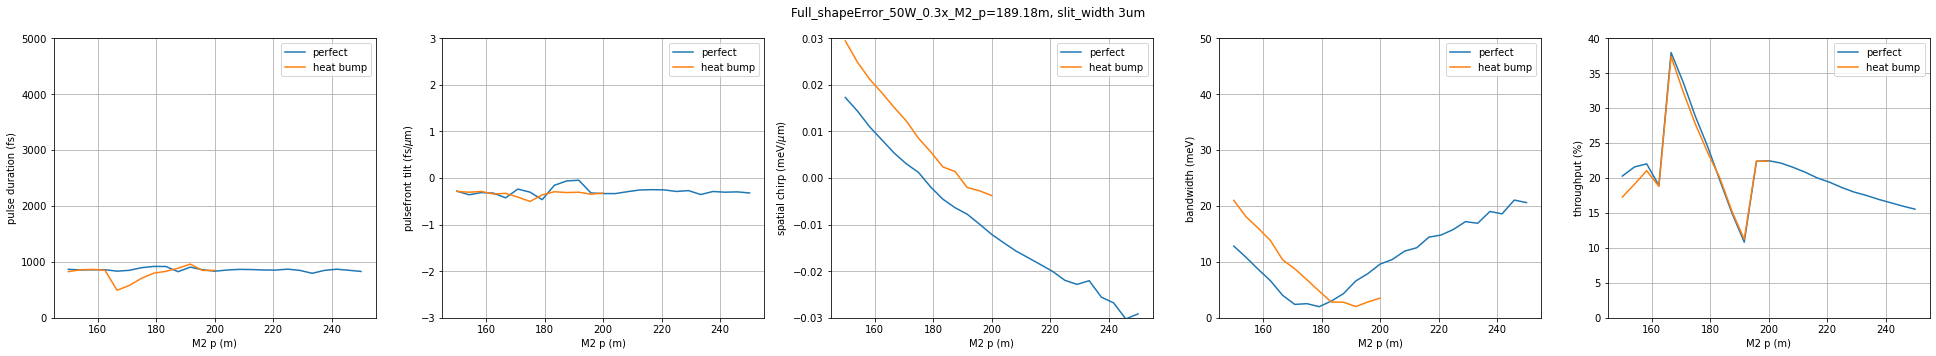

In [3]:
##### with shapeErrors

fname_option = 'Full_shapeError_50W_0.3x'

with h5py.File(dir_case+fname_option+'.h5', 'r') as f:
    m2_p1 = f['m2_p'][:]
    pulse_duration1 = f['pulse_duration'][:]
    pulse_tilt1 = f['tilt'][:]
    spatial_chirp1 = f['chirp'][:]
    energy_bandwidth1 = f['bandwidth'][:]
    throughput1 = f['throughput'][:]

##### get new m2_p
index = np.argwhere(spatial_chirp1 <= 0)[0][0]

a = m2_p1[index-1]; c1 = spatial_chirp1[index-1]
b = m2_p1[index]; c2 = spatial_chirp1[index]

result = (c1*b - c2*a)/(c1-c2)
print('m2_p optimized', result)
    
#### plot
plt.figure(figsize=(27,5))
plt.suptitle(fname_option+'_M2_p={}m, slit_width 3um'.format(round(result,2)))

# duration
plt.subplot(1,5,1)
plt.plot(m2_p, pulse_duration0, label='perfect')
plt.plot(m2_p1, pulse_duration1, label='heat bump')
plt.xlabel('M2 p (m)'); plt.ylabel('pulse duration (fs)')
plt.grid(); plt.legend(); plt.tight_layout()
plt.ylim([0, 5e3])

# tilt
plt.subplot(1,5,2)
plt.plot(m2_p, pulse_tilt0, label='perfect')
plt.plot(m2_p1, pulse_tilt1, label='heat bump')
plt.xlabel('M2 p (m)'); plt.ylabel(r'pulsefront tilt (fs/$\mu$m)')
plt.grid(); plt.legend(); plt.tight_layout()
plt.ylim([-3, 3])

# chirp
plt.subplot(1,5,3)
plt.plot(m2_p, spatial_chirp0*1000, label='perfect')
plt.plot(m2_p1, spatial_chirp1*1000, label='heat bump')
plt.xlabel('M2 p (m)'); plt.ylabel(r'spatial chirp (meV/$\mu$m)')
plt.grid(); plt.legend(); plt.tight_layout()
plt.ylim([-3e-2, 3e-2])

# bandwidth
plt.subplot(1,5,4)
plt.plot(m2_p, energy_bandwidth0*1000, label='perfect')
plt.plot(m2_p1, energy_bandwidth1*1000, label='heat bump')
plt.xlabel('M2 p (m)'); plt.ylabel('bandwidth (meV)')
plt.grid(); plt.legend(); plt.tight_layout()
plt.ylim([0, 50])

# throughput
plt.subplot(1,5,5)
plt.plot(m2_p, throughput0*100, label='perfect')
plt.plot(m2_p1, throughput1*100, label='heat bump')
plt.xlabel('M2 p (m)'); plt.ylabel('throughput (%)')
plt.grid(); plt.legend(); plt.tight_layout()
plt.ylim([0, 40])



plt.savefig(dir_case+fname_option+'_correction.png')
# plt.close('all')

In [4]:
print(fname_option)

Full_shapeError_50W_0.3x


In [5]:
import winsound
winsound.Beep(1500, 1000)